# Introduction to Computer Vision and Convolutional Neural Networks

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza🍕 & steak🥩) using the image data modification : [.ipynb](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

> 🔑**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [13]:
!rm -r *

# download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# for colab
# !unzip -q pizza_steak.zip

# remove extra data
!rm -r __MACOSX
!rm -r pizza_steak.zip
!rm -r pizza_steak/.DS_Store
!rm -r pizza_steak/train/.DS_Store
!rm -r pizza_steak/test/.DS_Store

--2021-05-25 08:14:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.177.128, 74.125.138.128, 64.233.185.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.177.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  89.5MB/s    in 1.2s    

2021-05-25 08:14:32 (89.5 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [14]:
!ls pizza_steak

test  train


In [15]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [16]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print("There are {} directories and {} images in {}".format(len(dirnames),len(filenames),dirpath))

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [17]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [18]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_nmaes from the subdirectories
print(class_names)

['pizza' 'steak']


In [19]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we'l view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  
  return img

Image shape: (512, 512, 3)


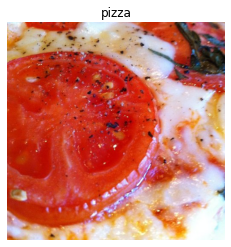

In [20]:
# View a random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [21]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[213, 228, 233],
        [217, 232, 239],
        [216, 234, 246],
        ...,
        [187, 152, 132],
        [193, 157, 133],
        [197, 161, 135]],

       [[212, 223, 229],
        [217, 230, 238],
        [221, 235, 246],
        ...,
        [188, 155, 140],
        [189, 156, 139],
        [191, 156, 137]],

       [[207, 211, 220],
        [215, 222, 232],
        [224, 232, 245],
        ...,
        [193, 164, 160],
        [191, 160, 155],
        [188, 158, 150]],

       ...,

       [[211, 120,  50],
        [208, 115,  46],
        [205, 108,  37],
        ...,
        [245, 254, 253],
        [245, 254, 253],
        [245, 254, 253]],

       [[223, 133,  55],
        [215, 123,  46],
        [208, 112,  35],
        ...,
        [245, 254, 253],
        [246, 255, 254],
        [246, 255, 254]],

       [[238, 149,  67],
        [225, 134,  53],
        [210, 118,  35],
        ...,
        [245, 254, 25

In [22]:
# View the image shape
img.shape # return width,height,color channels

(512, 512, 3)

> 🔑**Note:** Many machine learning models, including neural networks prefer the values they work with to be between 0 & 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also refered as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [23]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.83529412, 0.89411765, 0.91372549],
        [0.85098039, 0.90980392, 0.9372549 ],
        [0.84705882, 0.91764706, 0.96470588],
        ...,
        [0.73333333, 0.59607843, 0.51764706],
        [0.75686275, 0.61568627, 0.52156863],
        [0.77254902, 0.63137255, 0.52941176]],

       [[0.83137255, 0.8745098 , 0.89803922],
        [0.85098039, 0.90196078, 0.93333333],
        [0.86666667, 0.92156863, 0.96470588],
        ...,
        [0.7372549 , 0.60784314, 0.54901961],
        [0.74117647, 0.61176471, 0.54509804],
        [0.74901961, 0.61176471, 0.5372549 ]],

       [[0.81176471, 0.82745098, 0.8627451 ],
        [0.84313725, 0.87058824, 0.90980392],
        [0.87843137, 0.90980392, 0.96078431],
        ...,
        [0.75686275, 0.64313725, 0.62745098],
        [0.74901961, 0.62745098, 0.60784314],
        [0.7372549 , 0.61960784, 0.58823529]],

       ...,

       [[0.82745098, 0.47058824, 0.19607843],
        [0.81568627, 0.45098039, 0.18039216],
        [0.80392157, 0

 ## An end-to-end example

 Let's build a convolutional neural network to find patterns in out images, more specifically we need a way to:

 * Load our images
 * Preprocess our images
 * Build a CNN to find patterns in our images
 * Compile our CNN
 * Fit the CNN to our training data

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 0 & 1, also called as scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile or CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 0.6452 - accuracy: 0.6086 - val_loss: 0.3866 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4519 - accuracy: 0.7931 - val_loss: 0.3693 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3943 - accuracy: 0.8291 - val_loss: 0.3379 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3704 - accuracy: 0.8420 - val_loss: 0.3501 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3386 - accuracy: 0.8621 - val_loss: 0.2883 - val_accuracy: 0.8740


In [25]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](http://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.52527&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 3.6476 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6933 - accuracy: 0.4910 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6931 - accuracy: 0.5081 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.5000


In [27]:
# summary 
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...

let's try to improve our model

In [28]:
# set random seed
tf.random.set_seed(42)

# create model (same as above but let's improve it)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile model
model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit model
history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 4.4271 - accuracy: 0.5919 - val_loss: 0.4730 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.9533 - accuracy: 0.6839 - val_loss: 0.5760 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.8354 - accuracy: 0.7023 - val_loss: 1.1145 - val_accuracy: 0.5640
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6818 - accuracy: 0.7182 - val_loss: 0.4515 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4654 - accuracy: 0.7830 - val_loss: 0.4267 - val_accuracy: 0.7780


In [29]:
# summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit a model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment,experiment,experiment)

### 1. Become one with the data

Image shape: (384, 512, 3)
Image shape: (512, 384, 3)


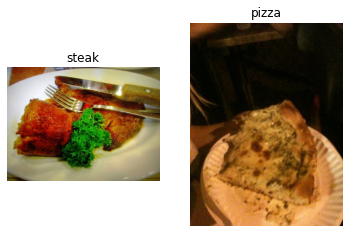

In [32]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)

In [33]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at onc time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health (said by ylecun)

In [36]:
# Create train and test generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [38]:
# Load in our image data from our directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                              target_size=(224,224), # Target size of images (height,width)
                                              class_mode="binary", # Type of data you're working with
                                              batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [39]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [40]:
# How many batches are there?
len(train_data)

47

In [41]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [42]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)